# 1.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import pptx as pptx
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import xlwings as xw

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

# 2.

In [ ]:
#CHAMO AS DUAS BASES DA B3
caminho_drive_passivo_novo = r"G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\1. ARQUIVOS B3\FORMATADOS\GARE\2. FEV"
caminho_drive_passivo_antigo = r"G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\1. ARQUIVOS B3\FORMATADOS\GARE\2. FEV"
suporte_codigo = r"G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\6. ARQUIVOS_SUPORTE_CÓDIGO"
dfNOVA = pd.read_excel(f"{caminho_drive_passivo_novo}\\09.02.xlsx")
dfANTIGA = pd.read_excel(f"{caminho_drive_passivo_antigo}\\06.02.xlsx")
grupos = pd.read_excel(f"{suporte_codigo}\\Grupos_cotistas.xlsx")
gare15 = pd.read_excel(f"{suporte_codigo}\\COTISTAS_OFERTA.xlsx")
galg15 = pd.read_excel(f"{suporte_codigo}\\COTISTAS_OFERTA_GALG15.xlsx")
oppbtg = pd.read_excel(f"{suporte_codigo}\\OPP_GARE11_BTG.xlsx")
cot_aai = pd.read_excel(f"{suporte_codigo}\\COTISTAS_AAI.xlsx")

#TESTE GITHUB


#INSIRO O CAMINHO DAS FONTES
caminho_Avenir = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Avenir Next LT Pro Regular.otf'
caminho_Geometeos = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Geometos Rounded.ttf'

#ALIMENTO DUAS VARIAVEIS COM AS FONTES
Avenir = fm.FontProperties(fname=caminho_Avenir)
Geometeos = fm.FontProperties(fname=caminho_Geometeos)

#FAÇO O MATPLTOLIB RECONHEÇER AS FONTES COMO FAMILIARIES
plt.rcParams['font.family'] = Avenir.get_name()
plt.rcParams['font.family'] = Avenir.get_name()

# 3.

In [135]:
#FAÇO UMA VERIFICAÇÃO PARA VER SE OS DOIS ARQUIVOS POSSUEM A MESMA QUANTIDADE DE COTAS
antg = dfANTIGA['TOTAL'].sum()
nov = dfNOVA['TOTAL'].sum()

#PREÇO COTA DIA
cota_d_1 = 8.61
#QUANTIDADE COTAS NEGOCIADAS
cotas_dia = 1318809
#ADICIONAR A DATA CORRETA AO DASHBOARD
dia = datetime(2026, 2, 9)

print('NOVO {}, ANTIGO {}'.format(nov, antg))

NOVO 289186438, ANTIGO 289186438


# 4.

In [136]:
def categorias(cat):
    if cat > 0 and cat <= 1000:
        return 1
    elif cat > 1000 and cat <= 5000:
        return 2
    elif cat > 5000 and cat <=20000:
        return 3
    elif cat > 20000 and cat <= 50000:
        return 4
    elif cat > 50000 and cat <= 100000:
        return 5
    elif cat > 100000 and cat<=500000:
        return 6
    elif cat > 500000 and cat <= 1000000:
        return 7
    elif cat > 1000000 and cat <= 3000000:
        return 8
    elif cat > 3000000 and cat <= 15000000:
        return 9
    elif cat > 15000000:
        return 10
    else:
        return 1
    

def movimentação(valor):
    if valor == 0:
        return 'Não Movimentou'
    else:
        return 'Movimentou'

def operação(x):
    if x < 0:
        return 'Venda'
    elif x == 0:
        return 'Manteve'
    else:
        return 'Compra'

def tag(x):
    if x == 'ASSOCIACAO CARIATATIVO-LITERARIA SAO JOSE':
        return 1
    elif x == 'BB FUNDO DE FUNDOS - FUNDO DE INVESTIMENTO IMOBILIARIO' or x == 'BB PREVIDENCIA MULTIMERCADO ALOCACAO IMOBLIARIA FI':
        return 2
    elif x == 'RIO BRAVO CAMPECHE FIC DE FIM' or x == 'RIO BRAVO FUNDO DE FII' or x == 'RIO BRAVO VALOR IMOBILIRIO MASTER FUNDO DE INVESTIMENTO EM C' or x == 'CAIXA RIO BRAVO FUNDO DE FI IMOBILIARIO FI' or x == 'CAIXA RIO BRAVO FUNDO DE FI IMOBILIARIO II':
        return 3
    elif x == 'REAL INVESTOR 70 PREVIDENCIA FIM' or x == 'REAL INVESTOR FUNDO DE INVESTIMENTO IMOBILIÁRIO' or x == 'REAL INVESTOR IMOBILIARIO MASTER FIC DE FIM CP':
        return 4
    else:
        return 0



def tratar_venda(tipo, val):
    if tipo == 'Venda' and val <0:
        val = val*-1
        return val
    else:
        return val


def realizar_calculo(w, t_atual, t_novo, calculo):
    if w > 0:
        calculo = t_atual - t_novo
        return calculo
    if w == 0:
        return w
    
def formatar_doc(doc):
    doc = str(doc)
    doc = doc.split('.')[0]

    if len(doc) <= 11:
        doc = doc.zfill(11)
    else:
        doc = doc.zfill(14)[:14]
    
    return doc
    

# 5.

In [137]:
#POR MEIO DA VARIAVEL DOCUMENTO EU ENCONTRO COTISTAS EXISTEM NA DFNOVA E NÃO EXISTE NA DFANTIGA, ASSIM EU CONSIGO VALIDAR QUANTOS COTISTAS NOVOS ENTRARAM
NC = dfNOVA[~dfNOVA['DOCUMENTO'].isin(dfANTIGA['DOCUMENTO'])]
NC['NOVOS_COTISTAS'] = 'NC'
#RENOMEIO A COLUNA DE TOTAL PARA TOTAL NOVO PARA EVENTUALMENTE CONCATENAR ESSE DATAFRAME NO DATAFRAME ATUAL DE MANEIRA CORRETA
NC = NC.rename(columns = {'TOTAL':'TOTAL_NOVO'})
#VERIFICO A QUANTIDADE DE COTAS EM POSSE DE COTISTAS NOVOS
teste2 = NC['TOTAL_NOVO'].sum()

novos_cotistas = NC['DOCUMENTO'].nunique()

#RETORNO DA QUANTIDADE DE COTAS NOVAS
print('O numero de novos cotistas foi de {}, e a quantidade de cotas em posse de novos cotistas foi de {}'.format(novos_cotistas, teste2))


O numero de novos cotistas foi de 2550, e a quantidade de cotas em posse de novos cotistas foi de 212486


C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_41832\155920912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC['NOVOS_COTISTAS'] = 'NC'


# 6.

In [138]:
#FAÇO UMA VERIFICAÇÃO DE DUPLICADOS
duplicado = dfANTIGA[dfANTIGA['DOCUMENTO'].duplicated(keep = False)]
#RETORNO DA VERIFICAÇÃO DE DUPLICADOS
duplicado

,CHAVE,DOCUMENTO,NOME,PF_PJ,TOTAL


# 7.

In [139]:
#FAÇO A UNIÃO USANDO O DF ANTIGO COMO BASE.
merge_df = pd.merge(dfANTIGA, dfNOVA[['DOCUMENTO', 'TOTAL']],
                    on = ['DOCUMENTO'],
                    how = 'left',
                    suffixes = ('', '_NOVO'))
#VERIFICO SE A QUANTIDADE DE COTAS DO DF ATUAL NÃO FOI ALTERADO, O NUMERO INCIALMENTE É MENOR POIS OS NOVOS COTISTAS NÃO FORAM ADICIONADOS
teste4 = merge_df['TOTAL_NOVO'].sum()
#RETORNO DA QUANTIDADE DE COTAS
teste4

np.float64(288973952.0)

# 8.

In [140]:
#RESULTADO DO DATAFRAME DA UNIÃO
merge_df

,CHAVE,DOCUMENTO,NOME,PF_PJ,TOTAL,TOTAL_NOVO
0,00000006556GLEDSON ANDRADE SANTOS,6556,GLEDSON ANDRADE SANTOS,PF,8950,8950.0
1,00000080527HUGO LEONARDO LEMOS MATOS,80527,HUGO LEONARDO LEMOS MATOS,PF,24,24.0
2,00000114790HANS HERBERT LAUBMEYER FILHO,114790,HANS HERBERT LAUBMEYER FILHO,PF,900,900.0
3,00000200018VERIDIANE CRISTINA ZACARIA,200018,VERIDIANE CRISTINA ZACARIA,PF,2,2.0
4,00000549258NICOLE PEREIRA DA COSTA,549258,NICOLE PEREIRA DA COSTA,PF,4,4.0
...,...,...,...,...,...,...
455882,99996766268KAMYLLA DE PAULA CAMPANARI BAR,99996766268,KAMYLLA DE PAULA CAMPANARI BARBOSA,PF,5,5.0
455883,99997177304CASSIA MONTEIRO PEREIRA,99997177304,CASSIA MONTEIRO PEREIRA,PF,50,50.0
455884,99997509153FRANCISLEI CARVALHO DOS REIS,99997509153,FRANCISLEI CARVALHO DOS REIS,PF,231,231.0
455885,99998963168RENATA NUNES DA CUNHA E SILVA,99998963168,RENATA NUNES DA CUNHA E SILVA ROSSIGNOLO,PF,20,20.0


# 9.

In [141]:
df_agrupado = merge_df.groupby(['DOCUMENTO']).size().reset_index(name='Quantidade')
#FAÇO A VERIFICAÇÃO PARA DESCOBRIR SE APÓS A UNIÃO DOS DATAFRAMES ALGUM COTISTA FOI DUPLICADO
df_duplicados = df_agrupado[df_agrupado['Quantidade'] > 1]
#RETORNO DA VERIFICAÇÃO
print(df_duplicados)

Empty DataFrame
Columns: [DOCUMENTO, Quantidade]
Index: []


# 10.

In [142]:
# CRIANDO UM NOVO DATAFRAME QUE É A CONCATENAÇÃO DO DATAFRAME DA UNIÃO DO ANTIGO COM O NOVO E O DATAFRAME QUE CONTÉM APENAS OS NOVOS COTISTAS
df_final = pd.concat([merge_df, NC])
# VERIFICANDO SE O TOTAL NOVO TEM A MESMA QUANTIDADE DE COTISTAS QUE O DF NOVO (ESSE NUMERO DEVE BATER, CASO DE DIFERENÇA, É PORQUE EXISTEM COTISTAS SENDO CONSIDERADOS A MAIS OU A MENOS)
teste6 = df_final['TOTAL_NOVO'].sum()
#RESULTADO DA VERIFICAÇÃO
teste6

np.float64(289186438.0)

# DADOS DE HIGHLIGHTS DO GARE11

# 11.

In [143]:
#PREÇO DO DIA ANALISADO

#TROCANDO OS VALORES DE NOT A NUMBER POR 0
df_final['TOTAL_NOVO'] = df_final['TOTAL_NOVO'].fillna(0)
df_final['TOTAL'] = df_final['TOTAL'].fillna(0)

#CRIANDO A COLUNA DE VARIAÇÃO DE COTAS
df_final['VAR_COTAS'] = df_final['TOTAL_NOVO'] - df_final['TOTAL']

#SUBSTITUINDO OS 0 POR 0.0001
#df_final['VAR_COTAS'] = df_final['VAR_COTAS'].replace(0, 0.0001)

#CRIANDO UMA COLUNA QUE INDICA O TIPO DE OPERAÇÃO
df_final['OPERAÇÃO'] = df_final['VAR_COTAS'].apply(operação)

#CRIANDO AS COLUNAS COM VALORES MONETARIOS
df_final['FINANCEIRO_ATUAL'] = df_final['TOTAL']*cota_d_1
df_final['FINANCEIRO_NOVO'] = df_final['TOTAL_NOVO']*cota_d_1
df_final['VAR_PRECO'] = df_final['VAR_COTAS']*cota_d_1

#df_final['TAG'] = df_final['NOME'].apply(tag)

#troca = {1:'ASSOCIACAO CARITATIVO', 2:'BB', 3:'RIO BRAVO', 4:'REAL INVESTOR'}

#df_final['GRATIS'] = df_final['TAG'].map(troca)

#df_final['NOME'] = df_final.apply(lambda row: row['GRATIS'] if row['TAG'] > 0 else row['NOME'], axis=1)


mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

#CRIANDO AS CATEGORIAS BASEADO NO FINANCEIRO_ATUAL
df_final['CATEGORIAS'] = np.where(df_final['FINANCEIRO_ATUAL'] > 0,
                                  df_final['FINANCEIRO_ATUAL'].apply(categorias),
                                  df_final['FINANCEIRO_NOVO'].apply(categorias))


#CRIANDO A COLUNA DE CATEGORIAS ATUAIS BASEADO NO FINANCEIRO_NOVO
df_final['CATEGORIAS ATUAIS'] = np.where(df_final['FINANCEIRO_NOVO'] >= 0,
                                  df_final['FINANCEIRO_NOVO'].apply(categorias),
                                  df_final['FINANCEIRO_ATUAL'].apply(categorias))

#CRIANDO UMA NOVA COLUNA DE CATEGORIAS ANTIGAS E MAPEANDO ELAS, PARA DEIXAR NA FORMA DE FAIXA DE INVESTIMENTO
df_final['CATEGORIAS ANTIGAS'] = df_final['CATEGORIAS'].map(mapear)
df_final['CATEGORIAS ATUAIS'] = df_final['CATEGORIAS ATUAIS'].map(mapear)
#============================================================================== FILTRANDO O DATAFRAME ==============================================================================#

#CRIO UM NOVO DATAFRAME EXCLUINDO OS MANTEVE, POIS ELES SÃO DESNECESSARIOS PARA AS ANALISES QUE QUERO FAZER
#df_final_filtrado = df_final[df_final['OPERAÇÃO'] != 'Manteve']

#ALTERO O VALOR DE VENDA DE NEGATIVO PARA POSITIVO
df_final['VAR_PRECO'] = np.where(df_final['OPERAÇÃO'] == "Venda", 
                                                 df_final['VAR_PRECO']* -1,
                                                 df_final['VAR_PRECO'])

#FAÇO A SOMA DE TODAS AS MOVIMENTAÇÕES QUE ACONTECERAM NO PERIODO NOVO
delta_sum = df_final['VAR_PRECO'].sum()

#CRIO UMA COLUNA DE % DE PARTICIPAÇÃO DE ACORDO COM A % QUE A MOVIMENTAÇÃO TEVE NO VOLUME DO DIA
df_final['Participação'] = (df_final['VAR_PRECO']/delta_sum)*100

#COLOCO EM %
df_final['Participação'] = df_final['Participação'].apply(lambda x: f'{x:.3f}%')

df_final['FINANCEIRO_ATUAL'] = df_final['FINANCEIRO_ATUAL'].round(2)
df_final['FINANCEIRO_NOVO'] = df_final['FINANCEIRO_NOVO'].round(2)
df_final['VAR_PRECO'] = df_final['VAR_PRECO'].round(2)

#COLUNA SUPORTE PARA CRIAR OS GRÁFICOS
df_final['Participação_sup'] = (df_final['VAR_PRECO']/delta_sum)*100
df_final['NOVOS_COTISTAS'] = df_final['NOVOS_COTISTAS'].fillna('ANTIGO')
df_final

,CHAVE,DOCUMENTO,NOME,PF_PJ,TOTAL,TOTAL_NOVO,NOVOS_COTISTAS,VAR_COTAS,OPERAÇÃO,FINANCEIRO_ATUAL,FINANCEIRO_NOVO,VAR_PRECO,CATEGORIAS,CATEGORIAS ATUAIS,CATEGORIAS ANTIGAS,Participação,Participação_sup
0,00000006556GLEDSON ANDRADE SANTOS,6556,GLEDSON ANDRADE SANTOS,PF,8950.0,8950.0,ANTIGO,0.0,Manteve,77059.50,77059.50,0.00,5,50k-100k,50k-100k,0.000%,0.000000
1,00000080527HUGO LEONARDO LEMOS MATOS,80527,HUGO LEONARDO LEMOS MATOS,PF,24.0,24.0,ANTIGO,0.0,Manteve,206.64,206.64,0.00,1,0-1k,0-1k,0.000%,0.000000
2,00000114790HANS HERBERT LAUBMEYER FILHO,114790,HANS HERBERT LAUBMEYER FILHO,PF,900.0,900.0,ANTIGO,0.0,Manteve,7749.00,7749.00,0.00,3,5k-20k,5k-20k,0.000%,0.000000
3,00000200018VERIDIANE CRISTINA ZACARIA,200018,VERIDIANE CRISTINA ZACARIA,PF,2.0,2.0,ANTIGO,0.0,Manteve,17.22,17.22,0.00,1,0-1k,0-1k,0.000%,0.000000
4,00000549258NICOLE PEREIRA DA COSTA,549258,NICOLE PEREIRA DA COSTA,PF,4.0,4.0,ANTIGO,0.0,Manteve,34.44,34.44,0.00,1,0-1k,0-1k,0.000%,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455669,99208490149HOUGLIS FERREIRA DA SILVA,99208490149,HOUGLIS FERREIRA DA SILVA,PF,0.0,5.0,NC,5.0,Compra,0.00,43.05,43.05,1,0-1k,0-1k,0.000%,0.000315
456099,99499886591LIDIOMAR ROCHA DA SILVA,99499886591,LIDIOMAR ROCHA DA SILVA,PF,0.0,12.0,NC,12.0,Compra,0.00,103.32,103.32,1,0-1k,0-1k,0.001%,0.000757
456256,99591308434MARGARIDA MARIA SILVESTRE,99591308434,MARGARIDA MARIA SILVESTRE,PF,0.0,2.0,NC,2.0,Compra,0.00,17.22,17.22,1,0-1k,0-1k,0.000%,0.000126
456394,99679051315MIGUEL JOSE SILVA NETO,99679051315,MIGUEL JOSE SILVA NETO,PF,0.0,1.0,NC,1.0,Compra,0.00,8.61,8.61,1,0-1k,0-1k,0.000%,0.000063


# 12.

In [144]:
zeraram = (df_final['TOTAL_NOVO'] == 0).sum()
novos_cotistas = (df_final['TOTAL'] == 0).sum()
net = novos_cotistas-zeraram
print('temos {} cotistas que zeraram e {} novos cotistas e o net foi de {} cotistas'.format(zeraram, novos_cotistas, net))

mov_cotistas = {'CATEGORIAS':['Novos Cotistas', 'Zeraram', 'Net'],
                'QUANTIDADE':[novos_cotistas, zeraram, net]}

offset = 1e5

temos 1599 cotistas que zeraram e 2550 novos cotistas e o net foi de 951 cotistas


# 13.

In [145]:
df_final['ENTRADA_GARE15'] = df_final['DOCUMENTO'].apply(lambda doc: 'GARE15' if doc in gare15['DOCUMENTO'].values else 'AUSENTE')
df_final['ENTRADA_GALG15'] = df_final['DOCUMENTO'].apply(lambda doc: 'GALG15' if doc in galg15['DOCUMENTO'].values else 'AUSENTE')
df_final['OPP_BTG'] = df_final['DOCUMENTO'].apply(lambda doc: 'OPP_GARE11_BTG' if doc in oppbtg['DOCUMENTO'].values else 'AUSENTE')
df_final['COTISTAS_AAI'] = df_final['DOCUMENTO'].apply(lambda doc: 'COTISTAS_AAI' if doc in cot_aai['DOCUMENTO'].values else 'AUSENTE')

# 14.

In [146]:
cotistas_aai = df_final.query('COTISTAS_AAI == "COTISTAS_AAI"')

# 15.

In [147]:
of_btg = df_final.query('OPP_BTG == "OPP_GARE11_BTG"')
of_btg['CATEGORIAS ATUAIS'] = of_btg['CATEGORIAS ATUAIS'].fillna('0-1k')
btg = of_btg.drop(columns = ['CHAVE', 'TOTAL', 'TOTAL_NOVO', 'CATEGORIAS', 'Participação_sup'])

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_41832\1495231522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  of_btg['CATEGORIAS ATUAIS'] = of_btg['CATEGORIAS ATUAIS'].fillna('0-1k')


# 16.

In [148]:
seila = df_final.query('ENTRADA_GARE15 == "GARE15" and (OPERAÇÃO == "Venda")')
seila['CATEGORIAS ATUAIS'] = seila['CATEGORIAS ATUAIS'].fillna('0-1k')
seila = seila.drop(columns = ['CHAVE', 'TOTAL', 'TOTAL_NOVO', 'CATEGORIAS', 'Participação_sup'])

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_41832\4214610207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seila['CATEGORIAS ATUAIS'] = seila['CATEGORIAS ATUAIS'].fillna('0-1k')


# 17.

In [149]:
base_dashboard = df_final.drop(columns=['CHAVE', 'Participação','CATEGORIAS', 'Participação_sup'])

base_dashboard['CATEGORIAS ATUAIS'] = base_dashboard['CATEGORIAS ATUAIS'].fillna('0-1k')

base_dashboard['% TOTAL'] = (base_dashboard['TOTAL_NOVO']/nov)

base_dashboard['DATA'] = dia

# 18.

In [150]:
duplicado_dffinal = df_final[df_final['DOCUMENTO'].duplicated(keep = False)]

duplicado_dffinal

,CHAVE,DOCUMENTO,NOME,PF_PJ,TOTAL,TOTAL_NOVO,NOVOS_COTISTAS,VAR_COTAS,OPERAÇÃO,FINANCEIRO_ATUAL,FINANCEIRO_NOVO,VAR_PRECO,CATEGORIAS,CATEGORIAS ATUAIS,CATEGORIAS ANTIGAS,Participação,Participação_sup,ENTRADA_GARE15,ENTRADA_GALG15,OPP_BTG,COTISTAS_AAI


# 19.

In [151]:
df_filtrad_venda = df_final.query('OPERAÇÃO == "Venda"') 
df_filtrad_compra = df_final.query('OPERAÇÃO == "Compra"')
df_filtrado_PF = df_final.query('PF_PJ == "PF"')
df_filtrado_PJ = df_final.query('PF_PJ == "PJ"')

#CRIANDO VARIAVEIS PARA DIVIDIR A QUANTIDADE DE COMPRA E VENDA
total_compra = df_final.query('OPERAÇÃO == "Compra"')['VAR_PRECO'].sum()
total_venda = df_final.query('OPERAÇÃO == "Venda"')['VAR_PRECO'].sum()

#COMPARANDO A QUANTIDADE DE COMPRA X VENDA (O VALOR DEVE SER IGUAL OU ESTAR PRÓXIMO, CASO A DIFERENÇA SEJA DISCREPANTE, SIGNIFICA QUE EXISTE ALGUM ERRO DE CALCULO OU SEPARAÇÃO)
print('O total financeiro de compra foi {}, e o total financeiro de vendas foi {}'.format(total_compra, total_venda))

O total financeiro de compra foi 6824027.7, e o total financeiro de vendas foi 6824027.7


# 20.

In [152]:
#FAZENDO A MESMO VERIFICAÇÃO ACIMA SÓ QUE PARA COTAS
total_cotas_compra = df_final.query('OPERAÇÃO == "Compra"')['VAR_COTAS'].sum()
total_cotas_venda = df_final.query('OPERAÇÃO == "Venda"')['VAR_COTAS'].sum()

#COMPARANDO A QUANTIDADE DE COMPRA X VENDA (O VALOR DEVE SER IGUAL OU ESTAR PRÓXIMO, CASO A DIFERENÇA SEJA DISCREPANTE, SIGNIFICA QUE EXISTE ALGUM ERRO DE CALCULO OU SEPARAÇÃO)
print('O total de cotas compradas foi {}, e o total de cotas vendidas foi {}'.format(total_cotas_compra, total_cotas_venda))

O total de cotas compradas foi 792570.0, e o total de cotas vendidas foi -792570.0


# 21.

In [153]:
daytrade = cotas_dia-total_cotas_compra

part_B3 = (total_cotas_compra/cotas_dia)
part_daytrade = (daytrade/cotas_dia)

total_PF = df_final.query('PF_PJ == "PF"')['TOTAL_NOVO'].sum()
total_PJ = df_final.query('PF_PJ == "PJ"')['TOTAL_NOVO'].sum()
Total = df_final['TOTAL_NOVO'].sum()

part_pf = (total_PF/Total)
part_pj = (total_PJ/Total)

data = {'B3':[part_B3],
        'DT':[part_daytrade],
        'PF':[part_pf],
         'PJ':[part_pj]}

tab_GARE11_b3xDT = pd.DataFrame(data)

tab_GARE11_b3xDT


,B3,DT,PF,PJ
0,0.600974,0.399026,0.56419,0.43581


# CRIANDO OS GRAFICOS DE COMPRA E VENDA E QUANTIDADE DE COTAS POR FAIXA DE INVESTIMENTO

# 22.

In [154]:
plim = df_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(str)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,1254907.50,Compra PF,18.39,0-1k
1,1,Compra,PJ,421.89,Compra PJ,0.01,0-1k
2,1,Manteve,PF,0.00,Manteve PF,0.00,0-1k
3,1,Manteve,PJ,0.00,Manteve PJ,0.00,0-1k
4,1,Venda,PF,-315427.35,Venda PF,-4.62,0-1k
5,1,Venda,PJ,-86.10,Venda PJ,-0.00,0-1k
6,2,Compra,PF,1389981.18,Compra PF,20.37,1k-5k
7,2,Manteve,PF,0.00,Manteve PF,0.00,1k-5k
8,2,Manteve,PJ,0.00,Manteve PJ,0.00,1k-5k
9,2,Venda,PF,-512372.49,Venda PF,-7.51,1k-5k


# 23.

In [155]:
def corrigir_categoria(plim):
    opp = plim['OPERAÇÃO'].unique()
    falta_compra = 'Compra' not in opp
    falta_venda = 'Venda' not in opp

    linhas_manteve = plim[plim['OPERAÇÃO'] == 'Manteve']
    
    for idx, row in plim.iterrows():
        if row['OPERAÇÃO'] == 'Manteve':
            if falta_venda:
                plim.at[idx, 'OPERAÇÃO'] = 'Venda'
                plim.at[idx, 'OPERAÇÃO_PF_PJ'] = f"Venda {row['PF_PJ']}"
                falta_venda = False
                continue
            elif falta_compra:
                plim.at[idx, 'OPERAÇÃO'] = 'Compra'
                plim.at[idx, 'OPERAÇÃO_PF_PJ'] = f"Compra {row['PF_PJ']}"
                falta_compra = False
                continue

    # Se ainda estiver faltando e só havia uma linha (ex: categoria 7 com apenas um "Manteve")
    if len(plim) == 1:
        row = plim.iloc[0]
        if falta_compra:
            nova_linha = row.copy()
            nova_linha['OPERAÇÃO'] = 'Compra'
            nova_linha['OPERAÇÃO_PF_PJ'] = f"Compra {row['PF_PJ']}"
            nova_linha['% PARTICIPAÇÃO'] = 0.0
            nova_linha['VAR_PRECO'] = 0.0
            plim = pd.concat([plim, pd.DataFrame([nova_linha])], ignore_index=True)
        elif falta_venda:
            nova_linha = row.copy()
            nova_linha['OPERAÇÃO'] = 'Venda'
            nova_linha['OPERAÇÃO_PF_PJ'] = f"Venda {row['PF_PJ']}"
            nova_linha['% PARTICIPAÇÃO'] = 0.0
            nova_linha['VAR_PRECO'] = 0.0
            plim = pd.concat([plim, pd.DataFrame([nova_linha])], ignore_index=True)

    return plim


df_corrigido = (
    plim.groupby('CATEGORIAS', group_keys=False)
    .apply(corrigir_categoria)
)

df_corrigido1 = pd.DataFrame(df_corrigido)

df_corrigido1



C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_41832\1646794764.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(corrigir_categoria)


,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,1254907.50,Compra PF,18.39,0-1k
1,1,Compra,PJ,421.89,Compra PJ,0.01,0-1k
2,1,Manteve,PF,0.00,Manteve PF,0.00,0-1k
3,1,Manteve,PJ,0.00,Manteve PJ,0.00,0-1k
4,1,Venda,PF,-315427.35,Venda PF,-4.62,0-1k
5,1,Venda,PJ,-86.10,Venda PJ,-0.00,0-1k
6,2,Compra,PF,1389981.18,Compra PF,20.37,1k-5k
7,2,Manteve,PF,0.00,Manteve PF,0.00,1k-5k
8,2,Manteve,PJ,0.00,Manteve PJ,0.00,1k-5k
9,2,Venda,PF,-512372.49,Venda PF,-7.51,1k-5k


# 24.

In [156]:
graf2 = df_corrigido1.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

graf2.set_index('CATEGORIAS')

graf2['CATEGORIAS'] = graf2['CATEGORIAS'].astype(str)

graf2['VAR_PRECO'] = np.where(graf2['OPERAÇÃO'] == "Venda", 
                                                 graf2['VAR_PRECO']* -1,
                                                 graf2['VAR_PRECO'])

graf2['OPERAÇÃO_PF_PJ'] = graf2['OPERAÇÃO'] + ' ' + graf2['PF_PJ']

graf2 = graf2[graf2['OPERAÇÃO'] != 'Manteve']

graf2['% PARTICIPAÇÃO'] = ((graf2['VAR_PRECO']/(total_compra))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

graf2['CLASSE_CATEGORIA'] = graf2['CATEGORIAS'].map(mapeamento)

graf2['CATEGORIAS'] = graf2['CATEGORIAS'].astype(int)

graf2 = graf2.sort_values(by='CATEGORIAS')

graf2['VAR_PRECO'].astype(float)

graf2['VAR_PRECO'] = graf2['VAR_PRECO'].round(2)

graf2

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,1254907.50,Compra PF,18.39,0-1k
1,1,Compra,PJ,421.89,Compra PJ,0.01,0-1k
4,1,Venda,PF,315427.35,Venda PF,4.62,0-1k
5,1,Venda,PJ,86.10,Venda PJ,0.00,0-1k
6,2,Compra,PF,1389981.18,Compra PF,20.37,1k-5k
9,2,Venda,PF,512372.49,Venda PF,7.51,1k-5k
10,3,Compra,PF,1703609.04,Compra PF,24.96,5k-20k
11,3,Compra,PJ,3185.70,Compra PJ,0.05,5k-20k
14,3,Venda,PF,584894.52,Venda PF,8.57,5k-20k
15,3,Venda,PJ,10753.89,Venda PJ,0.16,5k-20k


# 25.

In [157]:
graf1 = df_corrigido1.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

graf1.set_index('CATEGORIAS')

graf1['CATEGORIAS'] = graf1['CATEGORIAS'].astype(str)

graf1['OPERAÇÃO_PF_PJ'] = graf1['OPERAÇÃO'] + ' ' + graf1['PF_PJ']

graf1 = graf1[graf1['OPERAÇÃO'] != 'Manteve']

graf1['% PARTICIPAÇÃO'] = ((graf1['VAR_PRECO']/(total_compra))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

graf1['CLASSE_CATEGORIA'] = graf1['CATEGORIAS'].map(mapeamento)

graf1['CATEGORIAS'] = graf1['CATEGORIAS'].astype(int)

graf1 = graf1.sort_values(by='CATEGORIAS')

graf1['VAR_PRECO'].astype(float)

graf1['VAR_PRECO'] = graf1['VAR_PRECO'].round(2)

graf1

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,1254907.50,Compra PF,18.39,0-1k
1,1,Compra,PJ,421.89,Compra PJ,0.01,0-1k
4,1,Venda,PF,-315427.35,Venda PF,-4.62,0-1k
5,1,Venda,PJ,-86.10,Venda PJ,-0.00,0-1k
6,2,Compra,PF,1389981.18,Compra PF,20.37,1k-5k
9,2,Venda,PF,-512372.49,Venda PF,-7.51,1k-5k
10,3,Compra,PF,1703609.04,Compra PF,24.96,5k-20k
11,3,Compra,PJ,3185.70,Compra PJ,0.05,5k-20k
14,3,Venda,PF,-584894.52,Venda PF,-8.57,5k-20k
15,3,Venda,PJ,-10753.89,Venda PJ,-0.16,5k-20k


## BASE PARA GRAFICO DE QUANTIDADE DE COTAS POR FAIXA DE INVESTIMENTO

# 26.

In [158]:
qtde_cotas = df_final.groupby(by = ['CATEGORIAS', 'PF_PJ'])['TOTAL_NOVO'].sum().reset_index()

qtde_cotas.set_index('CATEGORIAS')

qtde_cotas['CATEGORIAS'] = qtde_cotas['CATEGORIAS'].astype(str)

qtde_cotas['% TOTAL'] = (qtde_cotas['TOTAL_NOVO']/nov)*100


# 1 - GRAFICO DE COTAS POR FAIXA DE INVESTIMENTO

# 27.

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

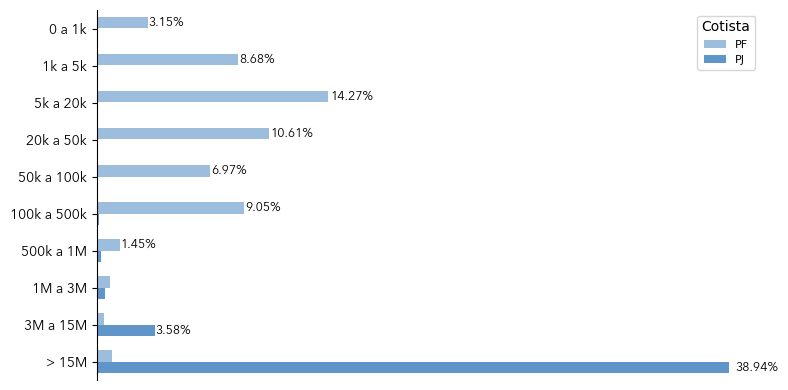

In [159]:
fig, ax = plt.subplots(figsize = (8, 4))

sb.barplot(data= qtde_cotas,
           x = '% TOTAL',
           y = 'CATEGORIAS',
           hue = 'PF_PJ',
           ax=ax,
           palette={'PF':'#91BDE7', 'PJ':'#4E95D9'},
           dodge=True,
           width = 0.6)


ylabels= [
    '0 a 1k',
    '1k a 5k',
    '5k a 20k',
    '20k a 50k',
    '50k a 100k',
    '100k a 500k',
    '500k a 1M',
    '1M a 3M',
    '3M a 15M',
    '> 15M'
]

ax.set_yticks(range(len(ylabels)))
ax.set_yticklabels(ylabels, fontsize=9, fontproperties = Avenir)
#ax.set_yticklabels(graf['CATEGORIAS'].unique())
#ax.yaxis.set_tick_params(labelsize = (14))

for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x) >= 1:
        ax.text(
            x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{x:.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            fontproperties=Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)




# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Cotista', loc='upper right', fontsize = 8)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COTAS_POR_CATEGORIA.png', transparent = True, dpi=300, bbox_inches='tight')

plt.show()

# BASE PARA GRÁFICO DE COMPRA POR CATEGORIAS

# 28.

In [160]:
graf_compra1 = graf1[graf1['OPERAÇÃO'] != 'Venda']

graf_compra = graf_compra1[graf_compra1['OPERAÇÃO_PF_PJ'] != 'Venda PJ']

graf_compra['CATEGORIAS'] = graf_compra['CATEGORIAS'].astype(str)

#graf_compra['OPERAÇÃO_PF_PJ'] = graf_compra['OPERAÇÃO'] + ' ' + graf_compra['PF_PJ']

graf_compra['VAR_PRECO'] = graf_compra['VAR_PRECO']

graf_compra['% PARTICIPAÇÃO'] = ((graf_compra['VAR_PRECO']/(total_venda))*100).round(2)

graf_compra['CLASSE_CATEGORIA'] = graf_compra['CATEGORIAS'].map(mapeamento)

graf_compra

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,1254907.50,Compra PF,18.39,0-1k
1,1,Compra,PJ,421.89,Compra PJ,0.01,0-1k
6,2,Compra,PF,1389981.18,Compra PF,20.37,1k-5k
10,3,Compra,PF,1703609.04,Compra PF,24.96,5k-20k
11,3,Compra,PJ,3185.70,Compra PJ,0.05,5k-20k
16,4,Compra,PF,809718.84,Compra PF,11.87,20k-50k
21,5,Compra,PF,334085.22,Compra PF,4.90,50k-100k
26,6,Compra,PF,898332.96,Compra PF,13.16,100k-500k
27,6,Compra,PJ,1437.87,Compra PJ,0.02,100k-500k
32,7,Compra,PF,11899.02,Compra PF,0.17,500k-1M


# 2 - GRAFICO DE COMPRA POR CATEGORIAS

In [161]:
#'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'

# 29.

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_41832\549481279.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(graf1['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next L

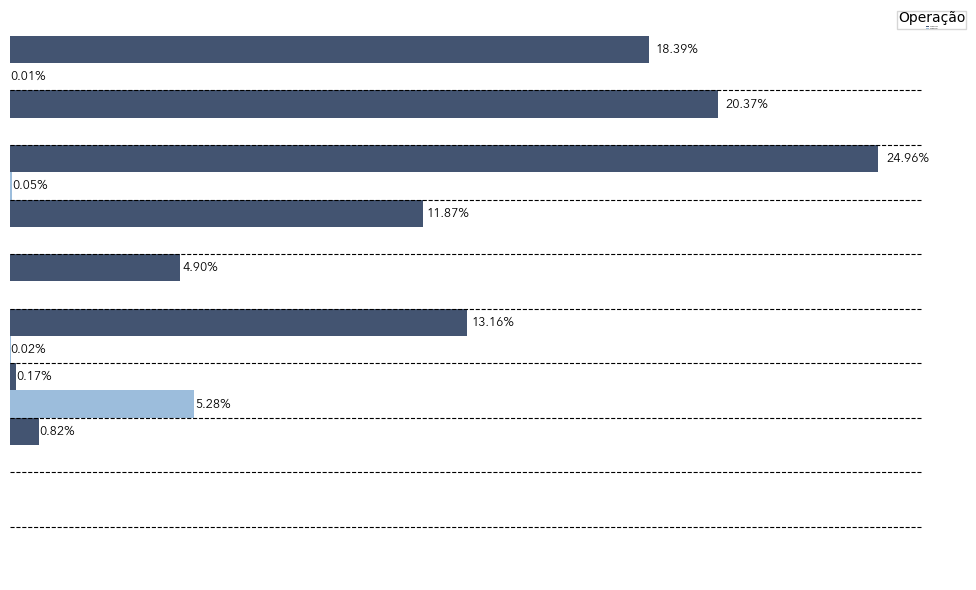

In [162]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=graf_compra, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(graf1['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(graf1['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

# BASE PARA GRAFICO DE VENDA POR CATEGORIAS

# 30.

In [163]:
graf_venda1 = graf1[graf1['OPERAÇÃO'] != 'Compra']

graf_venda = graf_venda1[graf_venda1['OPERAÇÃO_PF_PJ'] != 'Compra PJ']

graf_venda['CATEGORIAS'] = graf_venda['CATEGORIAS'].astype(str)

#graf_compra['OPERAÇÃO_PF_PJ'] = graf_compra['OPERAÇÃO'] + ' ' + graf_compra['PF_PJ']

graf_venda['VAR_PRECO'] = graf_venda['VAR_PRECO']

graf_venda['% PARTICIPAÇÃO'] = ((graf_venda['VAR_PRECO']/(total_venda))*100).round(2)

graf_venda['CLASSE_CATEGORIA'] = graf_venda['CATEGORIAS'].map(mapeamento)

graf_venda

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
4,1,Venda,PF,-315427.35,Venda PF,-4.62,0-1k
5,1,Venda,PJ,-86.10,Venda PJ,-0.00,0-1k
9,2,Venda,PF,-512372.49,Venda PF,-7.51,1k-5k
14,3,Venda,PF,-584894.52,Venda PF,-8.57,5k-20k
15,3,Venda,PJ,-10753.89,Venda PJ,-0.16,5k-20k
19,4,Venda,PF,-359915.22,Venda PF,-5.27,20k-50k
20,4,Venda,PJ,-37203.81,Venda PJ,-0.55,20k-50k
24,5,Venda,PF,-81364.50,Venda PF,-1.19,50k-100k
25,5,Venda,PJ,-32270.28,Venda PJ,-0.47,50k-100k
30,6,Venda,PF,-311423.70,Venda PF,-4.56,100k-500k


# 3 - GRAFICO DE VENDA POR CATEGORIAS

# 31.

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_41832\38867860.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(graf1['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT

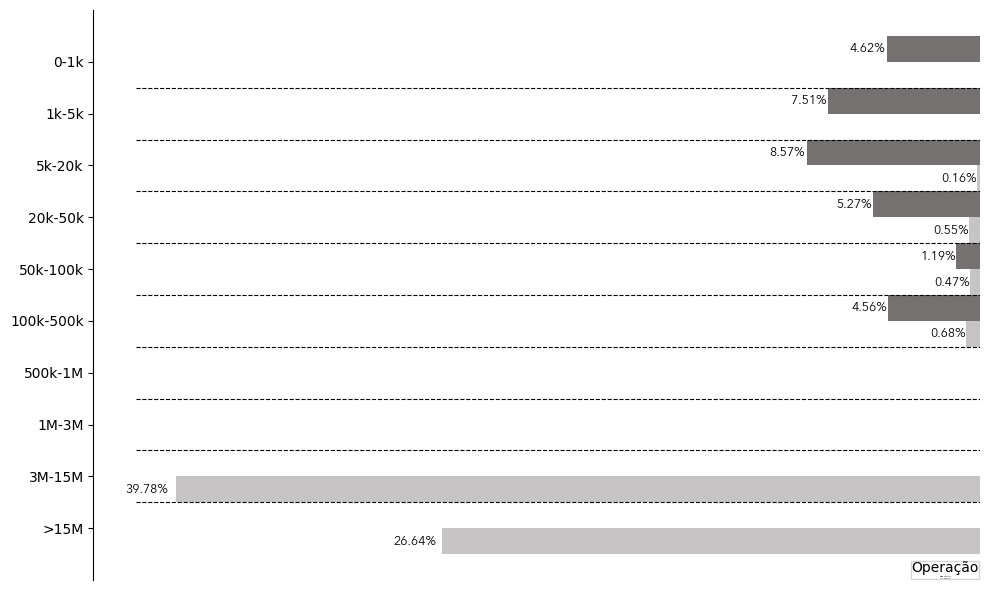

In [164]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=graf_venda, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(graf1['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(graf1['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

# CRIANDO OS TOP 10 QUANTIDADE DE COTAS (PF E PJ)

### GERAL COTAS - MAIORES COMPRADORES

# 32.

In [165]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
of = 'ENTRADA_GARE15'
of2 = 'ENTRADA_GALG15'
nc = 'NOVOS_COTISTAS'

TOP10_Compra = df_final.query('OPERAÇÃO == "Compra"')[[Nome,cat,tipo,fin_mov,cat_atuais,of,of2,nc]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Compra = TOP10_Compra.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra


,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS,ENTRADA_GARE15,ENTRADA_GALG15,NOVOS_COTISTAS
NOME,,,,,,,
XTX MARKETS TRADING LIMITED,500k-1M,PJ,360483.48,1M-3M,AUSENTE,AUSENTE,ANTIGO
SIDNEY CAPRA,100k-500k,PF,172200.00,100k-500k,AUSENTE,AUSENTE,ANTIGO
GERSON ALONSO TORRES,100k-500k,PF,150675.00,100k-500k,AUSENTE,AUSENTE,NC
VINICIUS CORAL GHANEM,100k-500k,PF,129150.00,100k-500k,AUSENTE,AUSENTE,NC
EDILSON ALVES DE ANDRADE,50k-100k,PF,59934.21,50k-100k,AUSENTE,AUSENTE,NC
LEANDRO AQUINO CARDOSO,50k-100k,PF,58548.00,50k-100k,AUSENTE,AUSENTE,NC
RODRIGO ABUD,1M-3M,PF,55965.00,1M-3M,AUSENTE,AUSENTE,ANTIGO
PAULO SILVA DOS REIS,5k-20k,PF,51660.00,50k-100k,AUSENTE,AUSENTE,ANTIGO
FERNANDO ANTONIO A FERREIRA,50k-100k,PF,50024.10,50k-100k,AUSENTE,AUSENTE,NC


### GERAL COTAS - MAIORES VENDEDORES

# 33.

In [166]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = df_final.query('OPERAÇÃO == "Venda"')[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2,nc]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Venda = TOP10_Venda.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS ATUAIS'] = TOP10_Venda['CATEGORIAS ATUAIS'].fillna('0-1k')

TOP10_Venda


,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS,ENTRADA_GARE15,ENTRADA_GALG15,NOVOS_COTISTAS
NOME,,,,,,,
BR PARTNERS BANCO DE INVESTIMENTO S/A,3M-15M,PJ,2629605.93,3M-15M,AUSENTE,AUSENTE,ANTIGO
CAPITANIA SECURITIES II FDO IN,>15M,PJ,1517899.95,>15M,AUSENTE,AUSENTE,ANTIGO
AAA FUNDO DE INVESTIMENTO MULTIMERCADO CREDITO PRIVADO INVES,>15M,PJ,299791.59,>15M,AUSENTE,AUSENTE,ANTIGO
PETERSON AGOS TUROLA,100k-500k,PF,136511.55,0-1k,GARE15,GALG15,ANTIGO
MR SOLAR SUPERMERCADOS LTDA,3M-15M,PJ,84739.62,3M-15M,AUSENTE,AUSENTE,ANTIGO
CAROLINA LEITE DE OLIVEIRA,100k-500k,PF,69870.15,50k-100k,AUSENTE,GALG15,ANTIGO
FLAVIO VILLANI MACEDO,100k-500k,PF,60270.00,100k-500k,AUSENTE,AUSENTE,ANTIGO
RIGEL COVE LP,100k-500k,PJ,46278.75,100k-500k,AUSENTE,AUSENTE,ANTIGO
JUMP TRADING EUROPE B.V.,20k-50k,PJ,37203.81,5k-20k,AUSENTE,AUSENTE,ANTIGO


# 34.

In [167]:
# Criar o Top 10 geral sem diversificar entre PF e PJ
TOP10_Geral = df_final[[Nome, tipo, cat_atuais, qtde]]

# Ordenar os valores pela coluna 'TOTAL_NOVO' em ordem decrescente e pegar os 10 maiores
TOP10_Geral = TOP10_Geral.sort_values(by=['TOTAL_NOVO'], ascending=False).iloc[:30, :]

# Renomear a coluna 'TOTAL_NOVO' para 'COTAS'
TOP10_Geral = TOP10_Geral.rename(columns={'TOTAL_NOVO': 'COTAS'})

#mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

#TOP10_Geral['CATEGORIAS ATUAIS'] = TOP10_Geral['CATEGORIAS'].map(mapear)

TOP10_Geral = TOP10_Geral.rename(columns = {'CATEGORIAS ATUAIS':'CATEGORIAS'})

# Exibir o resultado
TOP10_Geral

,NOME,PF_PJ,CATEGORIAS,COTAS
452536,MAXI RENDA FUNDO DE INVESTIMENTO IMOBILIARIO -...,PJ,>15M,15723069.0
304054,AAA FUNDO DE INVESTIMENTO MULTIMERCADO CREDITO...,PJ,>15M,11702142.0
204629,P TRIA LOG - FDO INV IMOB - RESPONSABILIDADE L...,PJ,>15M,10853962.0
403861,PPCM FUNDO DE INVESTIMENTO IMOBILIARIO RESP LI...,PJ,>15M,10848168.0
290548,PATRIA RENDA URBANA - FUNDO DE INVESTIMENTO IM...,PJ,>15M,8879024.0
259766,CAPITANIA SECURITIES II FDO IN,PJ,>15M,8813352.0
135547,CONEDI PARTICIPACOES LTDA,PJ,>15M,8417847.0
353790,BPG III LOGSTICA FUNDO DE INVESTIMENTO EM PART...,PJ,>15M,6340778.0
196620,PATRIA RECEBIVEIS IMOBILIARIOS - FIM- RESPONSA...,PJ,>15M,5353885.0
285749,XP CREDITO IMOBILIARIO FUNDO DE INVESTIMENTO I...,PJ,>15M,4439619.0


# 35.

In [168]:
#FAÇO A UNIÃO USANDO O DF ANTIGO COMO BASE.
df_grupos = pd.merge(df_final, grupos[['DOCUMENTO', 'GRUPO']],
                    on = ['DOCUMENTO'],
                    how = 'left')

df_grupos = df_grupos.fillna('SEM GRUPO')
agrupados = df_grupos.query('GRUPO != "SEM GRUPO"')
agrupados = agrupados.groupby(['GRUPO'])['TOTAL_NOVO'].sum()

agrupados = pd.DataFrame(agrupados)
agrupados


,TOTAL_NOVO
GRUPO,
BR PARTNERS,11217000.0
BROOKFIELD,6340778.0
BTG,4360417.0
CAPITANIA,12288782.0
DESCO,1066718.0
GUARDIAN,13921898.0
IRIDIUM,2126054.0
MANATI,740164.0
MRV,11223796.0


In [169]:
df_grupos_vendas = df_grupos.query('GRUPO != "SEM GRUPO"')
df_grupos_vendas['DATA'] = dia

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_41832\908538153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupos_vendas['DATA'] = dia


# CRIANDO O DATAFRAME FINAL ATUALIZADO

# 36.

In [170]:
#FAZENDO A ALTERAÇÃO DO VALOR ADICIONANDO O VALOR NOVO NO LUGAR DOS ANTIGOS (PARA AQUELES COTISTAS QUE MOVIMENTARAM)
df_final['TOTAL_FINAL'] = np.where(df_final['OPERAÇÃO'].isin(['Compra', 'Venda']),
                                   df_final['TOTAL_NOVO'],
                                   df_final['TOTAL'])

df_final1 = df_final.drop(columns = ['TOTAL_NOVO', 'TOTAL', 'VAR_COTAS', 'FINANCEIRO_ATUAL', 'FINANCEIRO_NOVO', 'VAR_PRECO', 'CATEGORIAS'])

#RENOMEANDO A COLUNA DE TOTAL FINAL PARA TOTAL
merge2 = df_final1.rename(columns = {'TOTAL_FINAL':'TOTAL'})

# EXCLUINDO TODAS AS LINHAS QUE SÃO IGUAIS A 0
merge2 = merge2[merge2['TOTAL'] != 0 ]

#VERIFICANDO A QUANTIDADE DE COTAS (ESSE VALOR DEVE SER IGUAL OU EXTREMAMENTE PROXIMO DO VALOR DE COTAS DO TOTAL DO DF ANTIGO, ESSE NUMERO NÃO DEVE SE ALTERAR NUNCA)
Tcotas = merge2['TOTAL'].sum()
Tcotistas = merge2['DOCUMENTO'].value_counts()
Tcotistas = merge2['DOCUMENTO'].nunique()

print('O total de cotistas é de {}, e o total de cotas é {}'.format(Tcotistas, Tcotas))

O total de cotistas é de 456838, e o total de cotas é 289186438.0


# 37.

In [171]:
net_cotistas = {'TOTAL':[Tcotistas],
        'Entraram':[novos_cotistas],
        'Sairam':[zeraram],
        }

tab_GARE11 = pd.DataFrame(net_cotistas)

tab_GARE11

,TOTAL,Entraram,Sairam
0,456838,2550,1599


# SALVANDO O DATAFRAME PARA CONSTRUIR O DASHBOARD

# 38.

In [172]:
#SALVANDO O DATAFRAME EM .XLSX EM UMA PASTA ESPECIFICA

#MAPEANDO O CAMINHO E SALVANDO A PLANILHA TRATADA COMO .XLSX
#pasta_destino = r'C:\Users\LucasCavalcante\Desktop\PASSIVO\DASHBOARD'
#CASO A PASTA NÃO EXISTA UMA SERA CRIADA IMEDIANTAMENT
#os.makedirs(pasta_destino, exist_ok=True)
#INSERE EM UMA VARIAVEL O CAMINHO E O NOME DO ARQUIVO
#caminho_arquivo_excel = os.path.join(pasta_destino, 'BASE_DASHBOARD.xlsx')
#EXPORTA O ARQUIVO PARA CSV E O SALVA NA PASTA QUE O CAMINHO INDICA
#base_dashboard.to_excel(caminho_arquivo_excel, index=False)

#print('Arquivo salvo com sucesso')

#SALVANDO O DATAFRAME EM .XLSX EM UMA PASTA ESPECIFICA

#MAPEANDO O CAMINHO E SALVANDO A PLANILHA TRATADA COMO .XLSX
pasta_destino = r'C:\Users\LucasCavalcante\Desktop\old'
#CASO A PASTA NÃO EXISTA UMA SERA CRIADA IMEDIANTAMENT
os.makedirs(pasta_destino, exist_ok=True)
#INSERE EM UMA VARIAVEL O CAMINHO E O NOME DO ARQUIVO
caminho_arquivo_excel = os.path.join(pasta_destino, 'cotistas_aai.xlsx')
#EXPORTA O ARQUIVO PARA CSV E O SALVA NA PASTA QUE O CAMINHO INDICA
cotistas_aai.to_excel(caminho_arquivo_excel, index=False)

print('Arquivo salvo com sucesso')

Arquivo salvo com sucesso



# FAZENDO BASE IDEAL PARA O RELATÓRIO SEMANAL

# 39.

In [173]:
base_semanal = df_final.drop(columns=['CHAVE', 'Participação'])

base_semanal['CATEGORIAS ATUAIS'] = base_semanal['CATEGORIAS ATUAIS'].fillna('0-1k')

base_semanal['% TOTAL'] = (base_semanal['TOTAL_FINAL']/287858061)

base_semanal['DATA'] = dia

base_semanal
    
base_semanal_compra = base_semanal[base_semanal['OPERAÇÃO'] == 'Compra']
base_semanal_venda = base_semanal[base_semanal['OPERAÇÃO'] == 'Venda']

# 40.

In [174]:
from openpyxl import load_workbook

def adicionar_dados_planilha(caminho_arquivo, nome_planilha, novos_dados):
    """
    Adiciona dados ao final de uma planilha do Excel existente.
    """
    try:
        # Verificar se o arquivo existe e carregar
        with pd.ExcelWriter(
            caminho_arquivo,
            engine='openpyxl',
            mode='a',  # Abre o arquivo em modo "append"
            if_sheet_exists='overlay'  # Permite adicionar dados a uma aba existente
        ) as writer:
            # Carregar a aba
            arquivo = load_workbook(caminho_arquivo)
            if nome_planilha in arquivo.sheetnames:
                sheet = arquivo[nome_planilha]
                # Encontrar a última linha preenchida
                last_row = sheet.max_row
                # Adicionar dados após a última linha
                novos_dados.to_excel(writer, sheet_name=nome_planilha, startrow=last_row, index=False, header=False)
            else:
                # Criar uma nova aba se a aba não existir
                novos_dados.to_excel(writer, sheet_name=nome_planilha, index=False)
        print("Dados adicionados com sucesso.")
    except Exception as e:
        print(f"Erro ao adicionar dados: {e}")

# Exemplo de uso
caminho_semanal = r'g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\2. SEMANAL\GARE\BASE_SEMANAL_21-27.xlsx'
caminho_mensal = r'g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GARE\BASE_MENSAL_GARE_JAN.xlsx'
caminho_venda_contrapartes = r'G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\3. E.E\Acompanhamento_venda_cotistas.xlsx'
nome_planilha = 'Planilha1'
nome_plan_mensal = 'Planilha1'
nome_vendas_contrapartes = 'Planilha1'
# Novo DataFrame para adicionar
new_compra = (base_semanal_compra)
new_venda = (base_semanal_venda)
contrapartes_vendas = (df_grupos_vendas)

#Chamando a função

#----SEMANAL----#
#adicionar_dados_planilha(caminho_semanal, nome_planilha, new_compra)
#adicionar_dados_planilha(caminho_semanal, nome_planilha, new_venda)
#----MENSAL----#
#adicionar_dados_planilha(caminho_mensal, nome_plan_mensal, new_compra)
#adicionar_dados_planilha(caminho_mensal, nome_plan_mensal, new_venda)
#----CONTRAPARTES DEALS----#
#adicionar_dados_planilha(caminho_venda_contrapartes, nome_vendas_contrapartes, contrapartes_vendas)

# 41.

In [175]:
from pptx import Presentation
from pptx.util import Inches, Pt, Cm

#Caminho do PowerPoint
caminho_ppt = r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\1. DIARIOS\GARE\Passivos_GARE11_base.pptx"
imagem_path_cotas_por_faixa = r"C:\\Users\\LucasCavalcante\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\COTAS_POR_CATEGORIA.png"
imagem_path_venda = r"C:\\Users\\LucasCavalcante\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\VENDA_PF_E_PJ.png"
imagem_path_compra = r"C:\\Users\\LucasCavalcante\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\COMPRA_PF_E_PJ.png"

#Abre a apresentação
prs = Presentation(caminho_ppt)

#Selecionando o primeiro slide
slide = prs.slides[0]

#Define a posição e o tamanho da imagem
left = Cm(0.02)
top = Cm(23.12)
width = Cm(11.4)
height = Cm(5.68)

leftV = Cm(0.08)
topV = Cm(11.2)
widthV = Cm(9.95)
heightV = Cm(6.05)

leftC = Cm(9.86)
topC = Cm(11.24)
widthC = Cm(9.01)
heightC = Cm(6.02)

#Adicionando a imagem ao slide
slide.shapes.add_picture(imagem_path_cotas_por_faixa, left, top, width=width, height=height)
slide.shapes.add_picture(imagem_path_venda, leftV, topV, width=widthV, height=heightV)
slide.shapes.add_picture(imagem_path_compra, leftC, topC, width=widthC, height=heightC)

#Salva a apresentação
prs.save(r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\1. DIARIOS\GARE\Passivos_GARE11_graficos.pptx")

# 42.

In [176]:
# Caminhos
caminho_arquivo = r"C:\Users\LucasCavalcante\Documents\FORMATAR_CxV_BASE\FORMATAR_COMPRAxVENDA_PASSIVO_GARE11_v8_BASE.xlsm"
caminho_destino = r"C:\Users\LucasCavalcante\Documents\FORMATAR_CxV_MACRO\FORMATAR_COMPRAxVENDA_PASSIVO_GARE11_v8_MACRO.xlsm"

# DataFrames e locais onde serão colados
dfs_cola = [
    (tab_GARE11_b3xDT, 'BASE_TABELAS', 'I6'),
    (TOP10_Compra, 'BASE_TABELAS', 'B13'),
    (TOP10_Venda, 'BASE_TABELAS', 'B28'),
    (tab_GARE11, 'DADOS_BROADCAST_COTISTAS', 'T4'),
    (agrupados, 'BASE_TABELAS', 'I44')
]

# Abrir Excel
app = None
wb = None

try:
    app = xw.App(visible=False)
    wb = app.books.open(caminho_arquivo)

    for df, aba, celula in dfs_cola:
        try:
            ws = wb.sheets[aba]
            ws.range(celula).value = df
        except Exception as e:
            print(f"❌ Erro ao colar na aba '{aba}' na célula {celula}: {e}")

    wb.save(caminho_destino)
    print(f"✅ Arquivo salvo com sucesso em: {caminho_destino}")

except Exception as e:
    print(f"❌ Erro geral ao processar o arquivo: {e}")

finally:
    if wb:
        wb.close()
    if app:
        app.quit()


✅ Arquivo salvo com sucesso em: C:\Users\LucasCavalcante\Documents\FORMATAR_CxV_MACRO\FORMATAR_COMPRAxVENDA_PASSIVO_GARE11_v8_MACRO.xlsm
